# NYC TAXI TRIP DURATION PROJECT

by Linh Pham

## 1. Information 

- Data Source: The dataset is based on the **2016 NYC Yellow Cab trip record** data made available in **Big Query** on **Google Cloud Platform**. The data was originally published by the **NYC Taxi and Limousine Commission (TLC)**. The data was sampled and cleaned for the purposes of this playground. Based on individual trip attributes, should predict the duration of each trip.

**NYC Taxi and Limousine Commission (TLC)** : http://www.nyc.gov/html/tlc/html/about/trip_record_data.shtml

**Download Data :** https://drive.google.com/open?id=1OyOC9y2x4uyT7drXJBOEZ2yRBktiQB8H

**Kaggle** : https://www.kaggle.com/c/nyc-taxi-trip-duration/data

- Data Attributes: 

●	train.csv - the dataset (contains 1458644 trip records)

●	id - a unique identifier for each trip

●	vendor_id - a code indicating the provider associated with the trip record

●	pickup_datetime - date and time when the meter was engaged

●	dropoff_datetime - date and time when the meter was disengaged

●	passenger_count - the number of passengers in the vehicle (driver entered value)

●	pickup_longitude - the longitude where the meter was engaged

●	pickup_latitude - the latitude where the meter was engaged

●	dropoff_longitude - the longitude where the meter was disengaged

●	dropoff_latitude - the latitude where the meter was disengaged

●	store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

●	trip_duration - duration of the trip in seconds

- Evaluation Metrics: 

The evaluation metric for this competition is Root Mean Squared Logarithmic Error. The RMSLE is calculated as

![alt text](https://i.stack.imgur.com/952Ox.png)

Where:

●	ϵ is the RMSLE value (score)

●	n is the total number of observations in the (public/private) data set

●	pi is your prediction of trip duration

●	ai is the actual trip duration for i. 

●	log(x) is the natural logarithm of x

- Objective: 

My objective for this project is to explore various attributes and build a Predictive model that predicts the total trip duration of taxi trips in New York City.

## 2. Loading Dataset

In [164]:
#Loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
df = pd.read_csv('train.csv', header = 0, parse_dates= True)
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [166]:
# Shape of data:

print('No. of examples', df.shape[0])
print('No. of features', df.shape[1])

No. of examples 1458644
No. of features 11


In [167]:
# Checking for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [168]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

We don't have any null values, so we don't have to work on missing values for this dataset.

# 3. Early Data Exploration & Processing

## 3.1. Categorical Variables

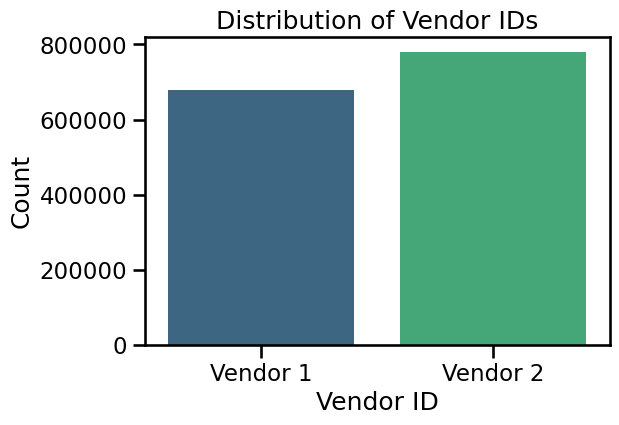

In [169]:
#Vendor ID
# Count occurrences
vendor_counts = df.vendor_id.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=vendor_counts.index, y=vendor_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Vendor ID')
plt.ylabel('Count')
plt.title('Distribution of Vendor IDs')
plt.xticks([0, 1], ['Vendor 1', 'Vendor 2'])  # Rename ticks if needed

# Show the plot
plt.show()

🔎 Insights: There are only two types of vendor, and New Yorkers seem to prefer vendor 2 over vendor 1.

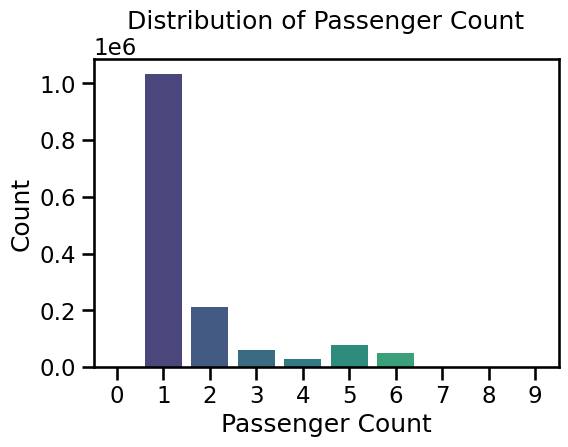

In [170]:
#Passenger count
# Count occurrences
passenger_counts = df.passenger_count.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=passenger_counts.index, y=passenger_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Passenger Count')
plt.ylabel('Count')
plt.title('Distribution of Passenger Count')

# Show the plot
plt.show()

In [171]:
print(passenger_counts)

passenger_count
0         60
1    1033540
2     210318
3      59896
4      28404
5      78088
6      48333
7          3
8          1
9          1
Name: count, dtype: int64


🔎 Insights: The most common trips are those with a single passenger, followed by trips with 2, 3, and 4 passengers. 
While the maximum recorded passenger count is 9, it's unclear whether vehicles with such a large capacity actually exist. 
Additionally, since only five trips had 7 or more passengers, these could likely be considered outliers.

There are 60 trips with 0 passengers, which might be an error in the logging system, so we would also rule these as outliers.

Text(0.5, 1.0, 'Store and Forward Flag')

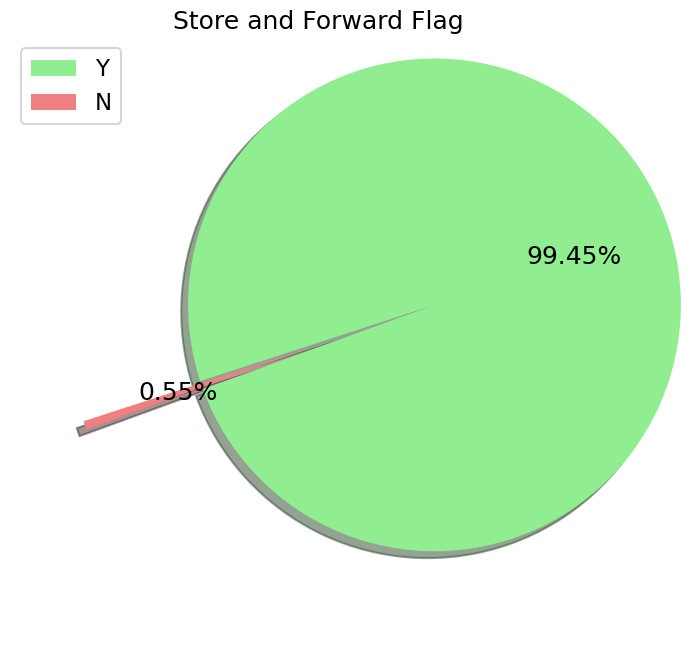

In [172]:
#Store & Forward flag

plt.figure(figsize=(8,8))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightgreen', 'lightcoral'], shadow=True, explode=[0.5,0], autopct='%1.2f%%', startangle=200)
plt.legend(labels=['Y','N'])
plt.title("Store and Forward Flag")

🔎 Insights: This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y = store and forward; N = not a store and forward trip. The plot shows us that almost all trips were stored in the vehicle before being sent to the vendor, indicating frequent connectivity issues or a system designed to buffer trip data before transmission.

Potential Network Gaps: The high percentage of 'Y' suggests that the vehicles often operate in areas with poor or no network coverage, leading to delayed data reporting.

In [173]:
#Label Encoding Features having Categorical Values

from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])

#df['vendor_id'] = df['vendor_id'].astype('category')
#df['store_and_fwd_flag'] = df['store_and_fwd_flag'].astype('category')

🔎 Insights: Conversion of 'store_and_fwd_flag' and 'vendor_id' to be Label encoded as those are Categorical features , binarizing them will help us to compute them with ease. We can convert these features into “category” type by function called “astype(‘category’)” that will speed up the Computation. Since, my plan is to go with PCA for dimension reduction, I’m not going with that approach.

## 3.2. Numerical Variables

In [174]:
df.describe()[1:]

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
mean,0.534950,1.664530,-73.973486,40.750921,-73.973416,40.751800,0.005515,9.594923e+02
std,0.498777,1.314242,0.070902,0.032881,0.070643,0.035891,0.074061,5.237432e+03
min,0.000000,0.000000,-121.933342,34.359695,-121.933304,32.181141,0.000000,1.000000e+00
25%,0.000000,1.000000,-73.991867,40.737347,-73.991325,40.735885,0.000000,3.970000e+02
50%,1.000000,1.000000,-73.981743,40.754101,-73.979752,40.754524,0.000000,6.620000e+02
75%,1.000000,2.000000,-73.967331,40.768360,-73.963013,40.769810,0.000000,1.075000e+03
max,1.000000,9.000000,-61.335529,51.881084,-61.335529,43.921028,1.000000,3.526282e+06


🔎 Insights: At first glance, the trips are short and the pickup - dropoff longitude and latitude are close, indicating there is a large number of short trips. 

<Axes: >

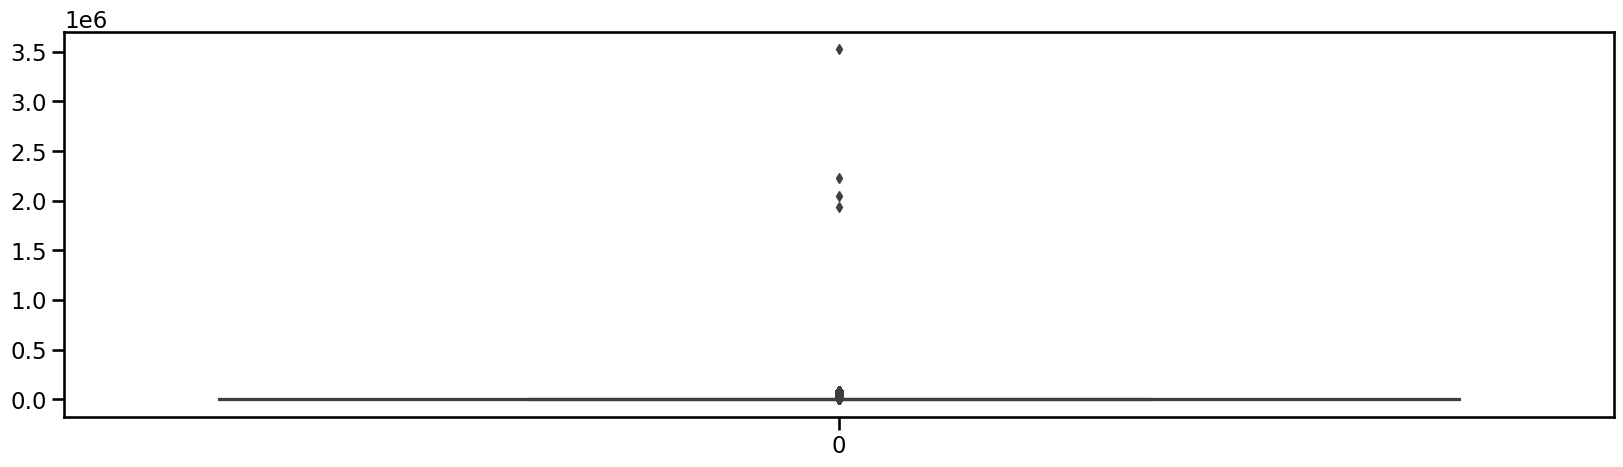

In [175]:
#Visualising Trip Duration
plt.figure(figsize=(20,5))
sns.boxplot(df['trip_duration'])

In [176]:
df['trip_duration'].max()

3526282

In [177]:
(df['trip_duration'] > 36000).value_counts()

trip_duration
False    1456632
True        2012
Name: count, dtype: int64

In [178]:
df['trip_duration'].min()

1

🔎 Insights: There are some outliers here, some trips have the duration of 3526282 seconds - which is just impossible. Some trips only last for 1 second. I'm going to rule out those trips as errors in the logging system - keeping only trips lasting under 10 hours and trips lasting longer than 4 minutes.

/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/1878315554.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['trip_duration']), kde=False, color='black')


Text(0.5, 1.0, 'Log Transformed - Trip Duration')

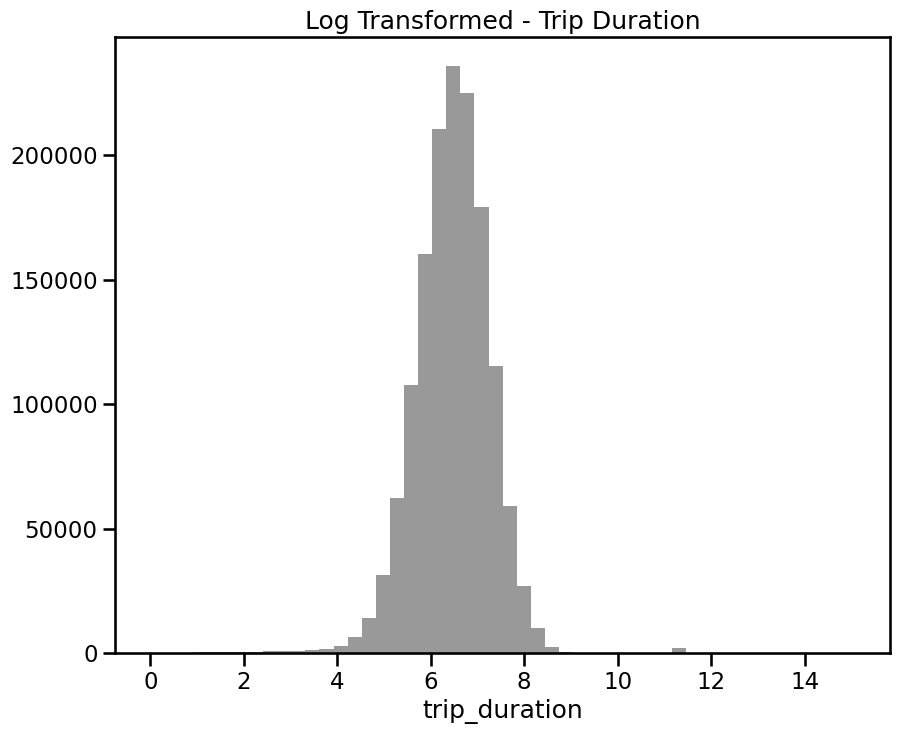

In [179]:
#Log Transformation
plt.figure(figsize=(10,8))
sns.distplot(np.log(df['trip_duration']), kde=False, color='black')
plt.title("Log Transformed - Trip Duration")

Since our Evaluation Metric is RMSLE, we'll proceed further with Log Transformed "Trip duration". Log Transformation Smoothens outliers by proving them less weightage.

## 3.3 Feature Engineering 

In [180]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)

df['pickup_day'] = df['pickup_datetime'].dt.day
df['pickup_month'] = df['pickup_datetime'].dt.month
df['pickup_date'] = df['pickup_datetime'].dt.date
df['pickup_hour'] = df['pickup_datetime'].dt.hour
df['pickup_min'] = df['pickup_datetime'].dt.minute
df['pickup_weekday'] = df['pickup_datetime'].dt.weekday

df['dropoff_min'] = df['dropoff_datetime'].dt.minute

In [181]:
df.pickup_month.value_counts()

pickup_month
3    256189
4    251645
5    248487
2    238300
6    234316
1    229707
Name: count, dtype: int64

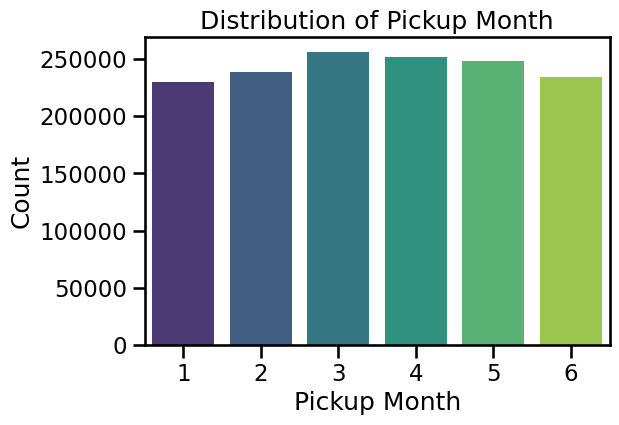

In [182]:
#Pickup Month 
pickup_counts = df.pickup_month.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Pickup Month')
plt.ylabel('Count')
plt.title('Distribution of Pickup Month')

# Show the plot
plt.show()

🔎 Insights: The distribution of pickup month seems pretty balanced. During March and April there are more trips compared to other months. 

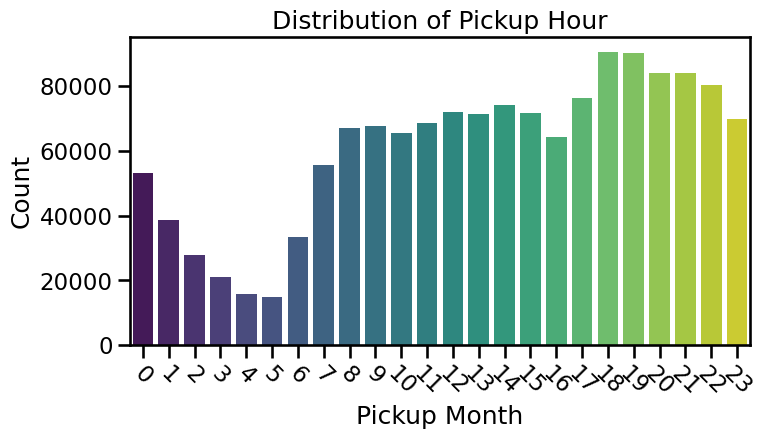

In [183]:
#Pickup Month 
pickup_counts = df.pickup_hour.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 4))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Pickup Month')
plt.xticks(rotation=-45)
plt.ylabel('Count')
plt.title('Distribution of Pickup Hour')

# Show the plot
plt.show()

🔎 Insights: People tend to order cabs during evening hour, and the least busy hours are the midnight-early morning hours.

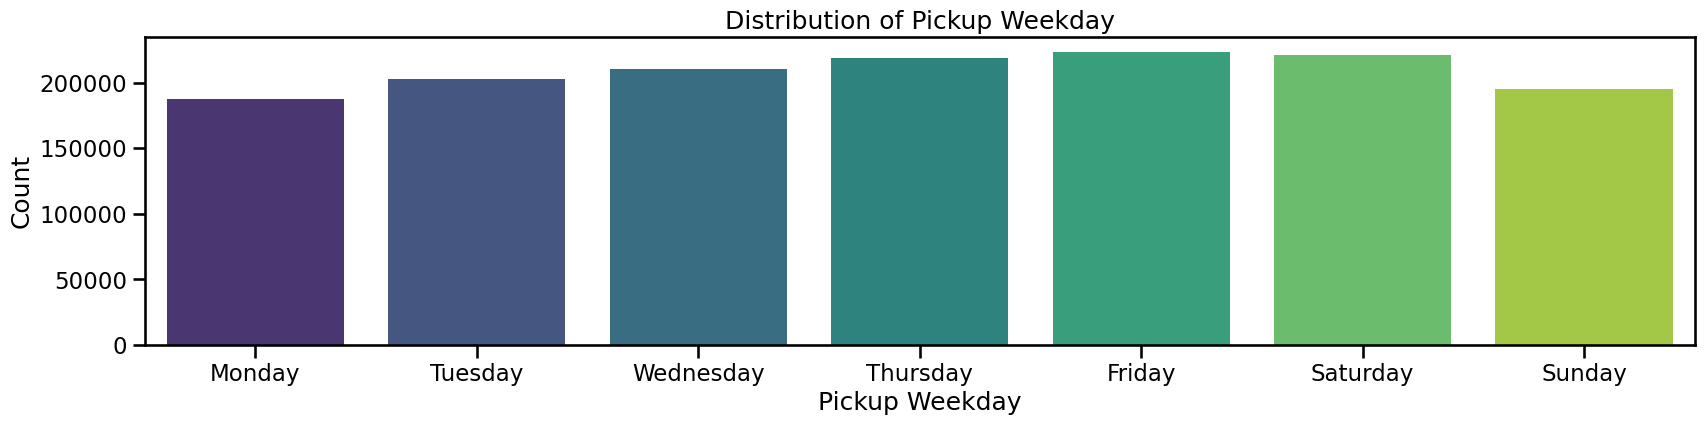

In [184]:
#Pickup Weekday
pickup_counts = df.pickup_weekday.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(20, 4))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Pickup Weekday')
plt.ylabel('Count')
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Pickup Weekday')

# Show the plot
plt.show()

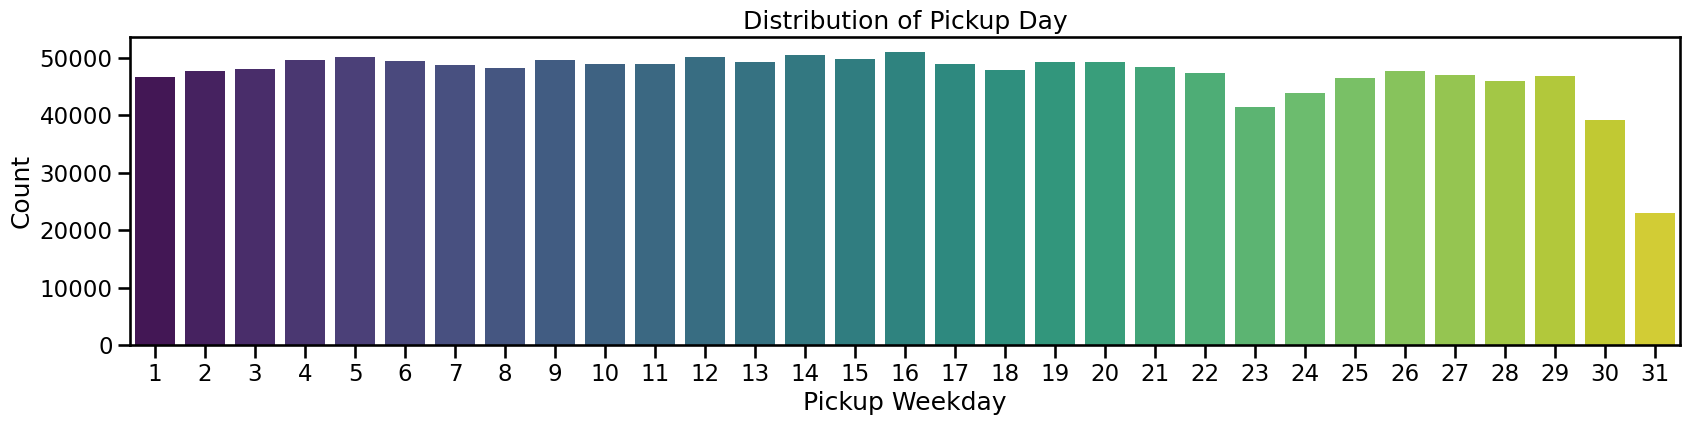

In [185]:
#Pickup Day
pickup_counts = df.pickup_day.value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(20, 4))
sns.barplot(x=pickup_counts.index, y=pickup_counts.values, palette='viridis')

# Labels and title
plt.xlabel('Pickup Weekday')
plt.ylabel('Count')
#plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Distribution of Pickup Day')

# Show the plot
plt.show()

🔎 Insights: Thursday, Friday, and Saturday are the busier days of the week for cabs.

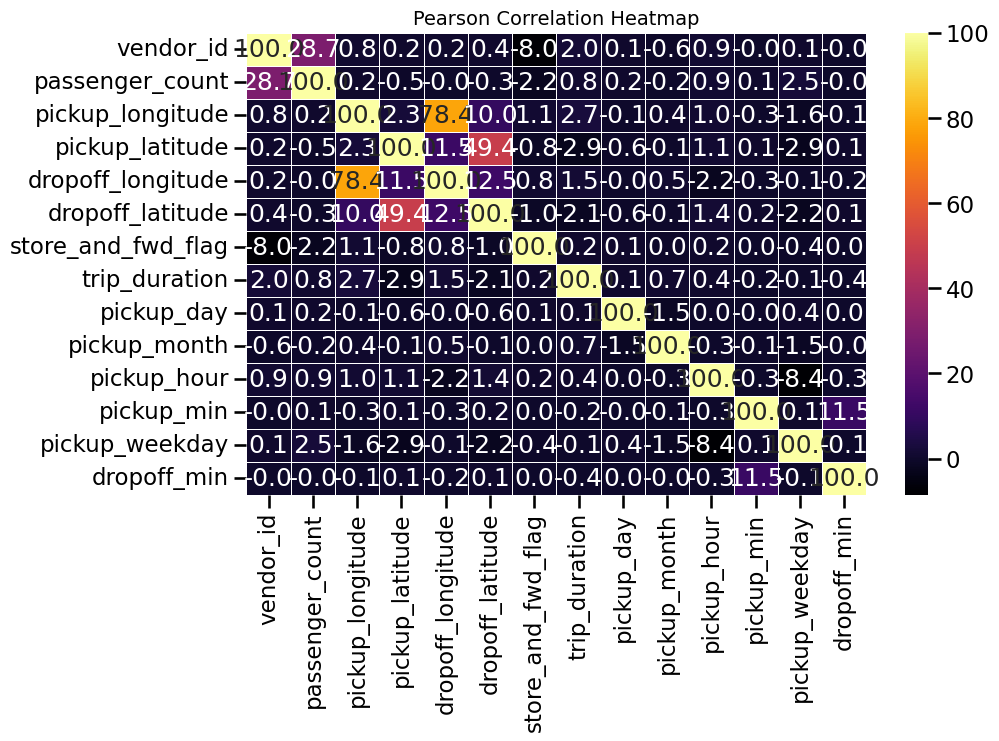

In [186]:
# Select only numeric columns
df_numeric = df.select_dtypes(include=['number'])

# Compute correlation and scale to percentage
correlation_matrix = df_numeric.corr() * 100

# Plot correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', fmt=".1f", linewidths=0.5)

# Title
plt.title('Pearson Correlation Heatmap', fontsize=14)

# Show plot
plt.show()


🔎 Insights: No pair of variables shows excessive correlation except for pickup - dropoff datetime, so I'll drop the dropoff datetime. The features I just created from pickup - dropoff time are all informative, so I won't drop any of them.

## 3.4 Data Cleaning

We clean the data based on the outliers we observed earlier.

In [187]:
import pandas as pd

def filter_trip_data(df):
    """
    Remove trips based on the following conditions:
    - Trip duration greater than 10 hours (36000 seconds)
    - Trip duration less than 5 minutes (300 seconds)
    - Trips with more than 7 passengers
    - Trips with 0 passengers
    """
    # Remove trips longer than 10 hours (36000 seconds) and shorter than 5 minutes (300 seconds)
    df_filtered = df[(df['trip_duration'] <= 36000) & (df['trip_duration'] >= 300)]
    
    # Remove trips with more than 7 passengers or 0 passengers
    df_filtered = df_filtered[(df_filtered['passenger_count'] <= 7) & (df_filtered['passenger_count'] > 0)]
    
    return df_filtered

# Apply the function to filter data
filtered_df = filter_trip_data(df)

In [188]:
# Check our data
filtered_df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_day,pickup_month,pickup_date,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,id2875421,1,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,0,455,14,3,2016-03-14,17,24,0,32
1,id2377394,0,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,0,663,12,6,2016-06-12,0,43,6,54
2,id3858529,1,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,19,1,2016-01-19,11,35,1,10
3,id3504673,1,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,0,429,6,4,2016-04-06,19,32,2,39
4,id2181028,1,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,0,435,26,3,2016-03-26,13,30,5,38


In [189]:
filtered_df.shape[0]/df.shape[0]*100

84.74542108972443

In [190]:
filtered_df = filtered_df.drop(columns = ['id', 'pickup_datetime', 'dropoff_datetime', 'pickup_date'])

In [191]:
# List of all datetime-related features
datetime_columns = ['pickup_day', 'pickup_month', 'pickup_hour', 'pickup_weekday', 'pickup_min']

# Apply Label Encoding to each of the datetime-related columns
for column in datetime_columns:
    filtered_df[column] = enc.fit_transform(filtered_df[column])

## 3.5 Data Normalization

In [192]:
#Predictors and Target Variable
X = filtered_df.drop(['trip_duration'], axis=1)
y = np.log(filtered_df['trip_duration'])

In [193]:
#Normalizing predictors
from sklearn.preprocessing import StandardScaler
cols = X.columns
ss = StandardScaler()
new_df = ss.fit_transform(X)
new_df = pd.DataFrame(new_df, columns=cols)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_day,pickup_month,pickup_hour,pickup_min,pickup_weekday,dropoff_min
0,0.931721,-0.509631,-0.120517,0.537225,0.111699,0.400855,-0.075558,-0.175786,-0.315524,0.519243,-0.320594,-1.564283,0.136796
1,-1.073282,-0.509631,-0.097537,-0.336469,-0.351240,-0.530831,-0.075558,-0.405621,1.468876,-2.157983,0.777353,1.525957,1.400745
2,0.931721,-0.509631,-0.079193,0.418312,-0.428971,-1.100510,-0.075558,0.398802,-1.505124,-0.425661,0.315059,-1.049243,-1.127152
3,0.931721,-0.509631,-0.488909,-0.889505,-0.521092,-1.191605,-0.075558,-1.095125,0.279276,0.834210,0.141699,-0.534203,0.538962
4,0.931721,-0.509631,-0.000273,1.288942,0.001538,0.858393,-0.075558,1.203224,-0.315524,-0.110693,0.026126,1.010917,0.481510


🔎 Insights: Normalizing the Dataset using Standard Scaling Technique. Now, why do we use Standard Scaling ? Why not MinMax or Normalizer ?

- It is because MinMax adjusts the value between 0’s and 1’s , which tend to work better for optimization techniques like Gradient descent and classification algorithms like KNN. Normalizer uses distance measurement like Euclidean or Manhattan, so Normalizer tend to work better with KNN. MinMax Scaling transforms the data to a fixed range, usually between 0 and 1. While this is useful in some machine learning algorithms (especially when dealing with distance-based algorithms like KNN), it is not ideal for PCA. PCA relies on variance, not on the specific range of values. MinMax scaling changes the feature distribution to fall within a certain range but doesn't guarantee that the feature variance is centered or normalized, which is crucial for PCA's covariance matrix computation.

- Normalizer scales each feature vector to have a unit norm (i.e., making the vector length equal to 1). This is used in distance-based algorithms like KNN or when dealing with sparse data (e.g., text data). It adjusts the magnitude of individual data points but not the spread (variance) of features across the dataset

- PCA (Principal Component Analysis) is a technique used for dimensionality reduction by finding the directions (principal components) in which the data has the most variance. Standard Scaling (Z-score normalization) is crucial for PCA because of the way PCA operates: PCA computes the covariance matrix of the dataset, which reflects the relationships between features (how each feature varies with others). The next step involves calculating the eigenvalues and eigenvectors of this covariance matrix. The eigenvectors represent the directions (principal components) in which the data varies the most, and the eigenvalues indicate the magnitude of the variance along each of these directions.

- Standard Scaling (i.e., subtracting the mean and dividing by the standard deviation) ensures that all features have zero mean and unit variance. This is important because PCA is sensitive to the scale of the data. If one feature has much larger values than another, the PCA results will be dominated by that feature, and it will distort the analysis. 

# 4. Feature Extration: Principal Component Analysis 

PCA is both a Dimensionality Reduction and Feature Extraction technique. It transforms the original features into new, independent features called principal components. These new features are uncorrelated with each other, meaning that PCA not only reduces the number of dimensions but also eliminates correlations between the variables. So, it's more than just a dimensionality reduction process—it's a way to extract meaningful, independent features from the original data.

In [194]:
X = new_df

In [195]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(filtered_df.columns)-1)
pca.fit_transform(X)
var_rat = pca.explained_variance_ratio_
var_rat

array([0.14149001, 0.1068401 , 0.10011836, 0.08322201, 0.07859159,
       0.07790178, 0.07598801, 0.07592547, 0.07531189, 0.07024816,
       0.05462185, 0.04326952, 0.01647124])

<BarContainer object of 13 artists>

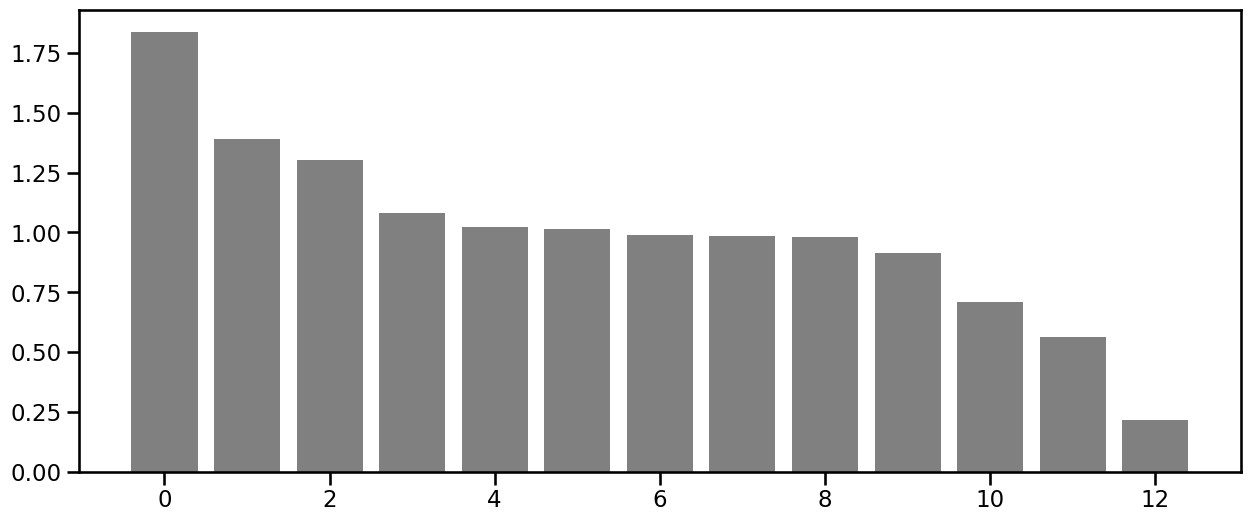

In [196]:
#Variance Ratio vs PC plot
plt.figure(figsize=(15,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color="grey")

Text(0.5, 1.0, 'Elbow Plot')

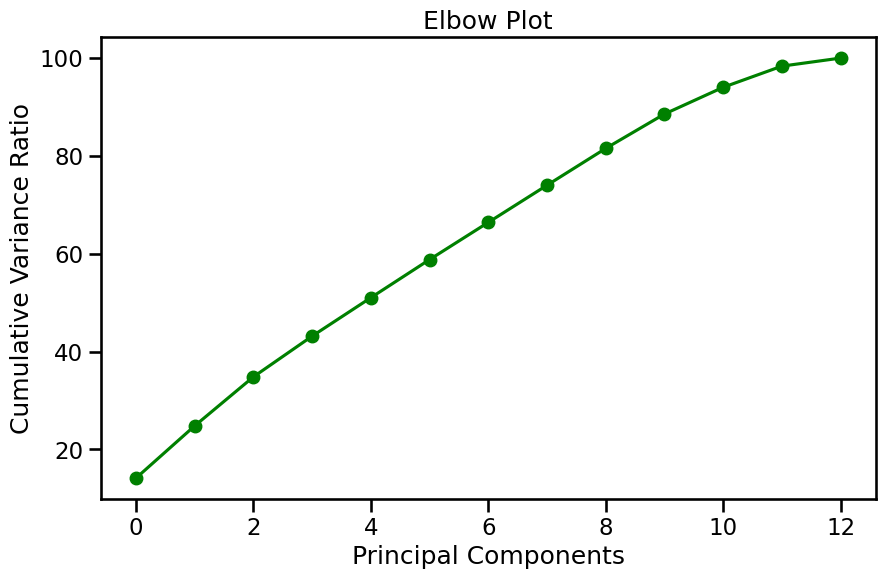

In [197]:
#Cumulative Variance Ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(var_rat)*100, color="g", marker='o')
plt.xlabel("Principal Components")
plt.ylabel("Cumulative Variance Ratio")
plt.title('Elbow Plot')

🔎 Insights: We can consider 12 as a required number of components and extracted new features by transforming the Data.

In [198]:
#Applying PCA as per required components
pca = PCA(n_components=12)
transform = pca.fit_transform(X)
pca.explained_variance_

array([1.83937166, 1.38892243, 1.30153979, 1.08188697, 1.02169147,
       1.01272396, 0.98784496, 0.98703191, 0.97905537, 0.91322683,
       0.71008466, 0.5625042 ])

Text(0.5, 1.0, 'Contribution of a Particular feature to our Principal Components')

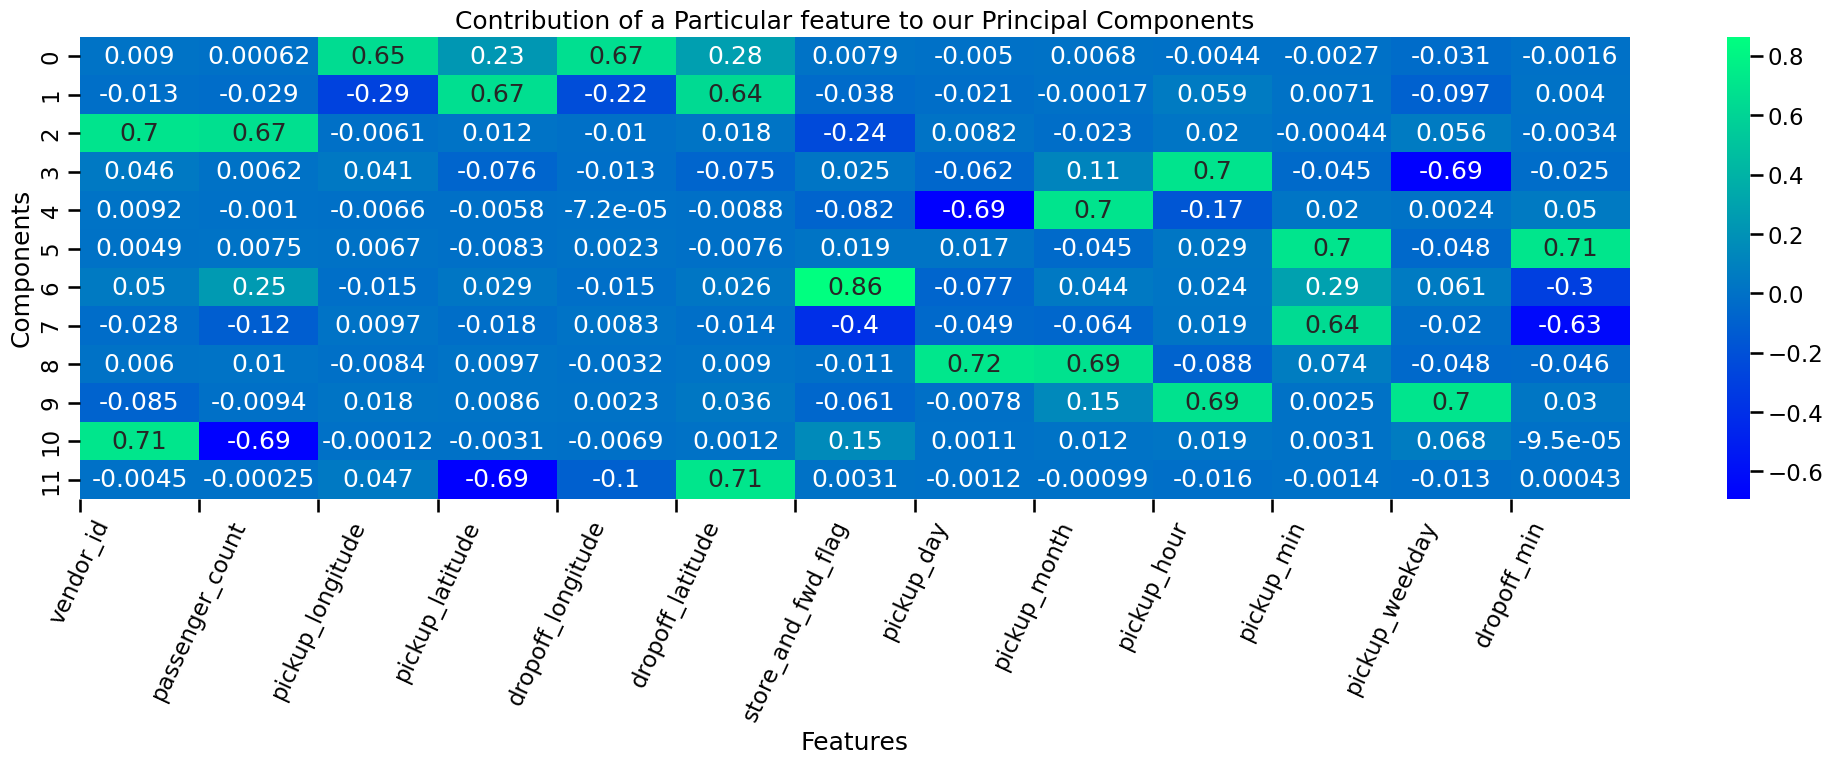

In [199]:
#importance of features in Particular Principal Component
plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap="winter")
plt.ylabel("Components")
plt.xlabel("Features")
plt.xticks(np.arange(len(X.columns)), X.columns, rotation=65)
plt.title('Contribution of a Particular feature to our Principal Components')

# 5. Data Splitting - And Choosing Models

🔎 Insights: Let’s pass the PCA Transformed data in our ML Regression Algorithms. To begin with , Linear Regression is a good approach, by splitting our Data into Training and Testing (30%).

Why Linear Regression , Decision Tree and Random Forest ?

1. Linear regression:

- Simple to explain.


- Model training and prediction are fast.


- No tuning is required except regularization.

2. Decision Tree:

- Decision trees are very intuitive and easy to explain.


- Decision trees are a common-sense technique to find the best solutions to problems with uncertainty.

3. Random Forest:

- It is one of the most accurate learning algorithms available.


- Random Forest consists of multiple Decision Trees. Each tree makes its own prediction, and the final result is determined by aggregating the predictions from all the trees. This process is called bagging (Bootstrap Aggregating), where each tree is trained on a random subset of the data with replacement. The final prediction is typically based on a majority vote (for classification) or average (for regression) of all the trees' predictions. This approach helps reduce overfitting and improves the model's generalization.


- Random forests overcome several problems with decision trees like Reduction in overfitting.


So, I want to approach from base model built using basic Linear Regression and then bring in more Sophisticated Algorithms - Decision Tree & Random Forest. It will give us good idea how Linear Regression performs against Decision Tree Regressor and Random Forest Regressor. Later, we will also approach with same algorithms on "without PCA" data. Finally, we'll evaluate both approaches we took and lay down recommended approach and algorithms.

In [200]:
#Passing in Transformed values as Predcitors
X = transform
y = np.log(filtered_df['trip_duration']).values

In [201]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error , mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((865293, 12), (370841, 12), (865293,), (370841,))

## 5.1. Linear Regression

In [202]:
#implementing Linear regression

from sklearn.linear_model import LinearRegression
est_lr = LinearRegression()
est_lr.fit(X_train, y_train)
lr_pred = est_lr.predict(X_test)
lr_pred

array([6.96875512, 6.67739615, 6.6842911 , ..., 6.72239082, 6.69323857,
       6.67386022])

In [203]:
#coeficients & intercept
est_lr.intercept_, est_lr.coef_

(6.680279045536279,
 array([ 0.04701831, -0.10953408, -0.00078977,  0.03698971,  0.01600127,
        -0.00322502,  0.00636729, -0.00666119,  0.02453051, -0.00230992,
        -0.00033456,  0.00482691]))

In [204]:
#examining scores

print ("Training Score : " , est_lr.score(X_train, y_train))
print ("Validation Score : ", est_lr.score(X_test, y_test))
print ("Cross Validation Score : " , cross_val_score(est_lr, X_train, y_train, cv=5).mean())
print ("R2_Score : ", r2_score(lr_pred, y_test))
#print ("RMSLE : ", np.sqrt(mean_squared_log_error(lr_pred, y_test)))

Training Score :  0.06717210019589193
Validation Score :  0.05546905339426955
Cross Validation Score :  -0.021764388729257324
R2_Score :  -10.98835200020368


/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/3264500931.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, kde=False, color="black", label="Test")
/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/3264500931.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 1.0, 'Test vs. Prediction')

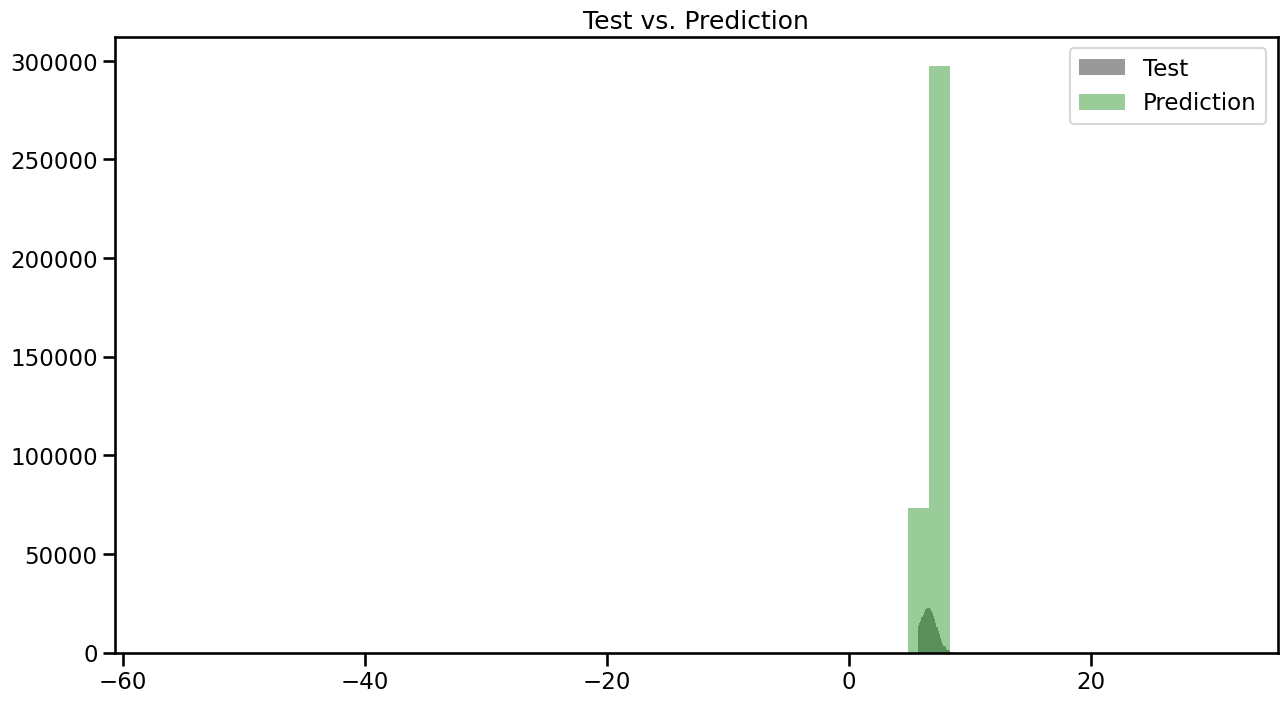

In [205]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color="g", label="Prediction")
plt.legend()
plt.title("Test vs. Prediction")

Linear Regression isn't performing well in this data - maybe the relationship undermining is too complex for such a simple model.

## 5.2. Decision Trees

In [206]:
#implementation of decision tree

from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion="squared_error", max_depth=10)
est_dt.fit(X_train, y_train)
dt_pred = est_dt.predict(X_test)
dt_pred

array([7.82921848, 5.99646728, 6.9001301 , ..., 6.7194852 , 6.14665414,
       6.32384321])

In [207]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, dt_pred)

# Display the result
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.03126187941797431


In [208]:
#examining metrics

print ("Training Score : " , est_dt.score(X_train, y_train))
print ("Validation Score : ", est_dt.score(X_test, y_test))
print ("Cross Validation Score : " , cross_val_score(est_dt, X_train, y_train, cv=5).mean())
print ("R2_Score : ", r2_score(dt_pred, y_test))
print ("RMSLE : ", np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score :  0.9131037338881232
Validation Score :  0.9047894867723499
Cross Validation Score :  0.905410027341792
R2_Score :  0.8952055714331791
RMSLE :  0.022817392095353918


/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/1395433894.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, kde=False, color="black", label="Test")
/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/1395433894.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 1.0, 'Test VS Prediction')

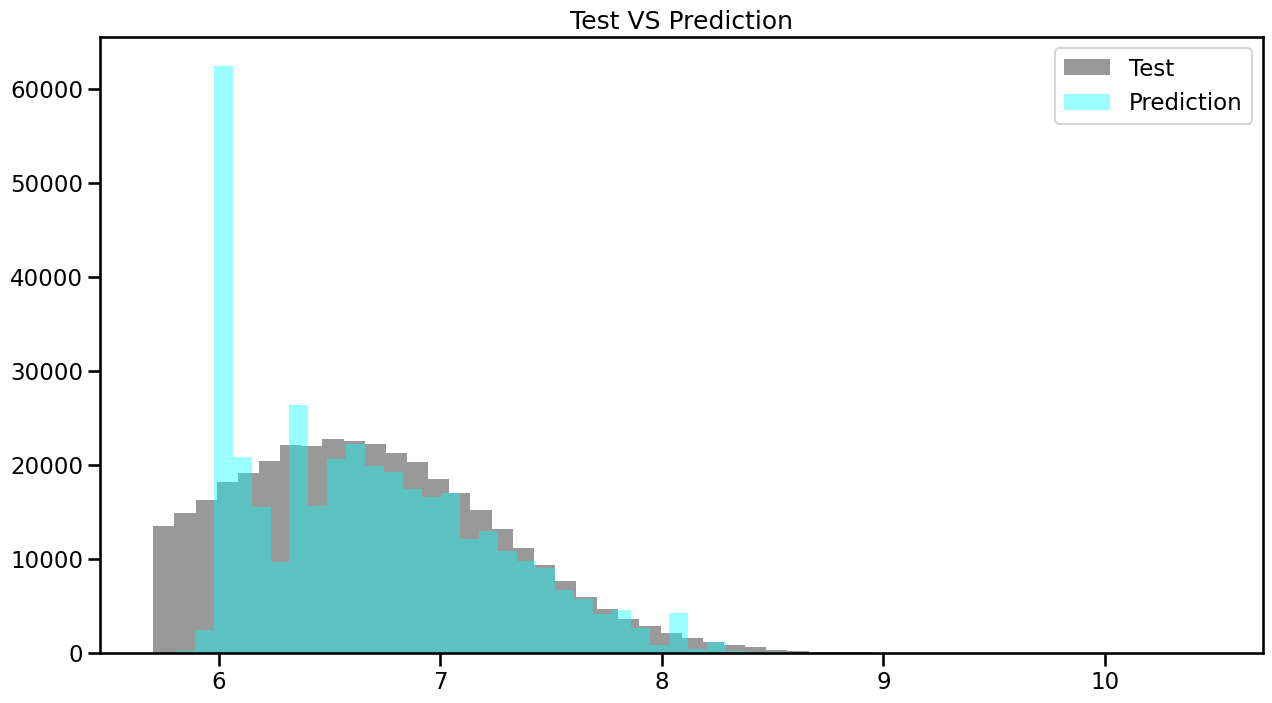

In [209]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color="cyan", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

From the above Viz, we can clearly identify that the Decision Tree Algorithm is performing well. It has a high F1 score and a low MSE. The actual data (in grey) and predicted values (in red) are as close as possible. We can conclude that Decision Tree could be a good choice for Trip duration prediction.

## 5.3. Random Forest

In [210]:
#random forest implementation
from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion="squared_error", n_estimators=5, max_depth=10)
est_rf.fit(X_train, y_train)
rf_pred = est_rf.predict(X_test)
rf_pred

array([7.8459029 , 6.03439695, 6.93175468, ..., 6.64569148, 6.10262062,
       6.51697224])

In [211]:
# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, rf_pred)

# Display the result
print("Mean Squared Error (MSE):", mse)

Mean Squared Error (MSE): 0.026311666148869678


In [212]:
#examining metrics
print ("Training Score : " , est_rf.score(X_train, y_train))

print ("Validation Score : ", est_rf.score(X_test, y_test))

print ("Cross Validation Score : " , cross_val_score(est_rf, X_train, y_train, cv=5).mean())

print ("R2_Score : ", r2_score(rf_pred, y_test))

print ("RMSLE : ", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

Training Score :  0.9252541459167427
Validation Score :  0.9198657507306451
Cross Validation Score :  0.9182199716270683
R2_Score :  0.9104664193171143
RMSLE :  0.020893287814068948


/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/1406956887.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test, kde=False, color="black", label="Test")
/var/folders/hs/fc5z923d2nggb2cc22lj7ct80000gn/T/ipykernel_95872/1406956887.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.d

Text(0.5, 1.0, 'Test VS Prediction')

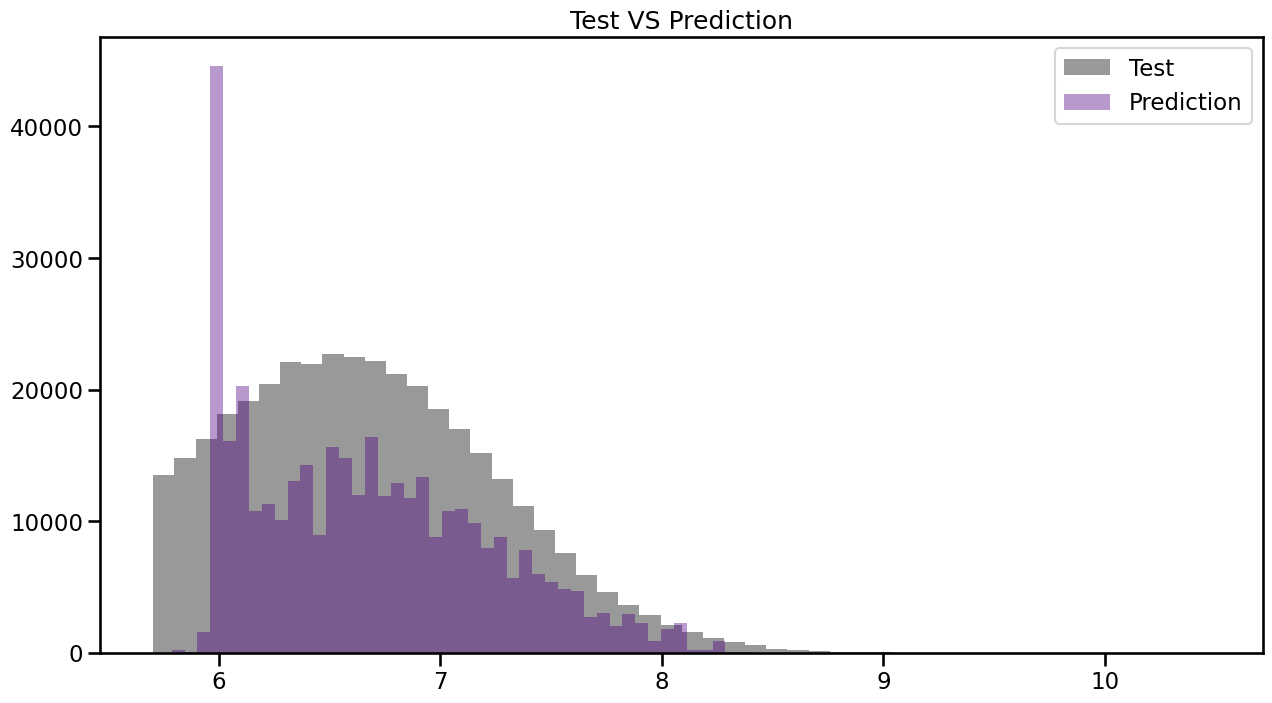

In [213]:
#prediction vs real data

plt.figure(figsize=(15,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color="black", label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color="indigo", label="Prediction")
plt.legend()
plt.title("Test VS Prediction")

Random Forest also performs pretty well, with a slightly higher Training Score than Decision Trees and slightly lower MSE. I believe hyperparameter tuning would be beneficial.

## 5.4. Model Evaluation

Text(0.5, 1.0, 'R2 Scores')

<Figure size 1000x700 with 0 Axes>

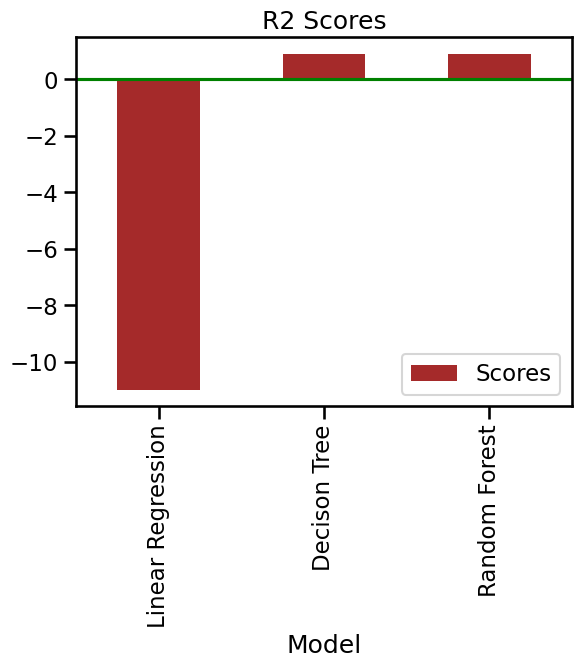

In [214]:
plt.figure(figsize=(10,7))
r2 = pd.DataFrame({'Scores':np.array([r2_score(lr_pred, y_test), r2_score(dt_pred, y_test), r2_score(rf_pred, y_test)]), 'Model':np.array(['Linear Regression', 'Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="brown")
plt.axhline(y=0, color='g')
plt.title("R2 Scores")

Decision Tree and Random Forest perform much better than Linear Regression. 

Text(0.5, 1.0, 'RMSLE - Lesser is Better')

<Figure size 1000x1000 with 0 Axes>

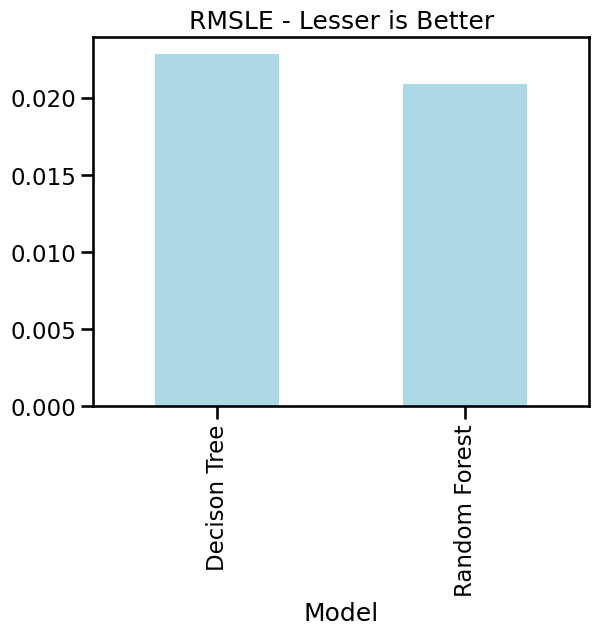

In [215]:
#RMSLE plot
plt.figure(figsize=(10,10))
r2 = pd.DataFrame({'RMSLE':np.array([np.sqrt(mean_squared_log_error(dt_pred, y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model':np.array(['Decison Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind="bar", color="lightblue", legend=False)
plt.title("RMSLE - Lesser is Better")

In [216]:
#Null RMSLE implementation
y_null = np.zeros_like(y_test, dtype=float)
y_null.fill(y_test.mean())
print ("Null RMSLE : ", np.sqrt(mean_squared_log_error(y_test, y_null)))

Null RMSLE :  0.07379175959558605


Our Decision Tree and Random Forest's RMSLE are much better than the null RMSLE (guessing the mean/random guessing). Although DT risks overfitting the training datast, Random Forest reduces this problem.

# 6. Fitting the Test Dataset

In [217]:
test = pd.read_csv("test.csv")

In [218]:
test_data = test

In [219]:
test_data.head()

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag
0,id3004672,1,2016-06-30 23:59:58,1,-73.988129,40.732029,-73.990173,40.756680,N
1,id3505355,1,2016-06-30 23:59:53,1,-73.964203,40.679993,-73.959808,40.655403,N
2,id1217141,1,2016-06-30 23:59:47,1,-73.997437,40.737583,-73.986160,40.729523,N
3,id2150126,2,2016-06-30 23:59:41,1,-73.956070,40.771900,-73.986427,40.730469,N
4,id1598245,1,2016-06-30 23:59:33,1,-73.970215,40.761475,-73.961510,40.755890,N


In [220]:
test_data.pickup_datetime = pd.to_datetime(test_data.pickup_datetime)
test_data['pickup_day'] = test_data['pickup_datetime'].dt.day
test_data['pickup_month'] = test_data['pickup_datetime'].dt.month
test_data['pickup_date'] = test_data['pickup_datetime'].dt.date
test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour
test_data['pickup_min'] = test_data['pickup_datetime'].dt.minute
test_data['pickup_weekday'] = test_data['pickup_datetime'].dt.weekday

In [221]:
test_data = test_data.drop(columns = ['id', 'pickup_datetime', 'pickup_date'])

In [222]:
test_data['store_and_fwd_flag'] = enc.fit_transform(test_data['store_and_fwd_flag'])
test_data['vendor_id'] = enc.fit_transform(test_data['vendor_id'])

In [223]:
datetime_columns = ['pickup_day', 'pickup_month', 'pickup_hour', 'pickup_weekday', 'pickup_min']

# Apply Label Encoding to each of the datetime-related columns
for column in datetime_columns:
    test_data[column] = enc.fit_transform(test_data[column])

In [224]:
pca = PCA(n_components=12)
X_test = pca.fit_transform(test_data)
pca.explained_variance_

array([3.00336956e+02, 7.57590095e+01, 4.09192196e+01, 3.79496387e+00,
       2.81934705e+00, 1.74101605e+00, 2.25174179e-01, 9.66580623e-03,
       5.42043860e-03, 1.60655300e-03, 9.85901760e-04, 5.61960392e-04])

In [225]:
# Make predictions for test data
est_rf.fit(X, y)
dt_pred = est_dt.predict(X_test)
rf_pred = est_rf.predict(X_test)

In [228]:
# Create the submission DataFrame
submission = pd.DataFrame({'id': test['id'], 'trip_duration': rf_pred})
submission['trip_duration'] = np.expm1(submission['trip_duration'])

# Save the predictions to a CSV for submission
submission.to_csv("submission.csv", index=False)

In [229]:
submission.shape[0]

625134